# ECG learning with Physionet dataset
This file is showing an example of how to load the ECG data from the physionet dataset that was originally downloaded from https://www.physionet.org/content/qtdb/1.0.0/

This is a exercise of refactorize my code developed couple of years ago. 

Make sure to refer to  **'requirements.txt'** to use the packages with the listed version. 
With some other versions of packages, it may not be compatible with 'wfdb' package, most likely the newer version of'numpy' package

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import wfdb  # used, wfdb==4.1.2 waveform database package, a library of tools for reading, writing, and processing WFDB signals and annotations.
from lib import HelpferFunctions as hf  # custom module with helperfunctions needed here

In [2]:
# read the .hea file, header file, describing signal file contents and format
data_path   = 'qt-database-1.0.0'  # this cardiac data was downloaded and saved locally
record_name = 'sel30'   # assign one record here to show as an example
record_path = os.path.join(data_path, record_name)
record = wfdb.rdrecord(record_path)
print(f"Record Name: {record.record_name}")
print(f"Sampling rate: {record.fs}")


Record Name: sel30
Sampling rate: 250


In [3]:
# Read the signal
signals, fields = wfdb.rdsamp(record_path)
fs = fields['fs']
length = fields['sig_len']
print(f"Signals shape is: {signals.shape}")
print(f"Signals fields are: {fields.keys()}")

Signals shape is: (224993, 2)
Signals fields are: dict_keys(['fs', 'sig_len', 'n_sig', 'base_date', 'base_time', 'units', 'sig_name', 'comments'])


In [4]:
# Read the annotation file (.atr)
annotation = wfdb.rdann(record_path, 'pu1')
example_sample = annotation.sample
example_symbol = annotation.symbol

# expand the annotation
anntype_0  = annotation.symbol  # one long annotation type for a long recording, it has string, i.e.['(', 'p', ')', '(', 'N', ')'...]
annsamp_0  = annotation.sample  # the index of the related annotation in the long time series
annot_expand = hf.expand_annotation(annsamp_0, anntype_0, length) 
print(f"The first 100 annotation is: {annot_expand[0:300]}")


The first 100 annotation is: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  

Here, each annotation means:

'QRS complex':0, 'st section':1, 't wave':2, 'iso':3, 'p wave':4, 'p-q section':5
'Default value that is not being annotated is": -1.

Refer to 'expand_annotation()' in custom helper module.

### Take channel 0 as an example to display
Each single recording has the length of 224993, here we only display the first 1000 data points

In [5]:
display_length = 1000  # randomly select the first 1000 data points to visualize the data.
my_annotation = annot_expand[0:display_length]
time_vector = np.arange( 0, display_length/fs, 1/fs)  # time vector for selected signal

Text(0.5, 0, 'time (s)')

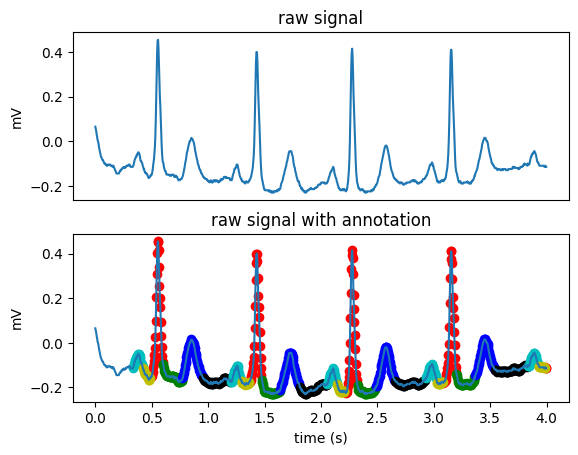

In [6]:
my_signal     = signals[0:display_length, 0]

plt.figure()
# plot the raw signal
plt.subplot(2,1,1)
plt.plot(time_vector, my_signal,)
plt.title('raw signal')
plt.xticks([]) # hide x axis
plt.ylabel('mV')

# plot the raw signal with different annotations for each section within the signal
plt.subplot(2,1,2)
plt.plot(time_vector, my_signal,)
plt.title('raw signal with annotation')
myN = np.where(my_annotation==0)[0]
plt.scatter(time_vector[myN], my_signal[myN], color='r', marker='o' )

myst = np.where(my_annotation==1)[0]
plt.scatter(time_vector[myst], my_signal[myst], color='g', marker='o')

myt = np.where(my_annotation==2)[0]
plt.scatter(time_vector[myt], my_signal[myt], color='b', marker='o')

myiso = np.where(my_annotation==3)[0]
plt.scatter(time_vector[myiso], my_signal[myiso], color='k', marker='o')

myp = np.where(my_annotation==4)[0]
plt.scatter(time_vector[myp], my_signal[myp], color='c', marker='o')

mypq = np.where(my_annotation==5)[0]
plt.scatter(time_vector[mypq], my_signal[mypq], color='y', marker='o')
plt.ylabel('mV')
plt.xlabel('time (s)')

### Take channel 1 as an example to display¶
Each single recording has the length of 224993, here we only display the first 1000 data points

Text(0.5, 0, 'time (s)')

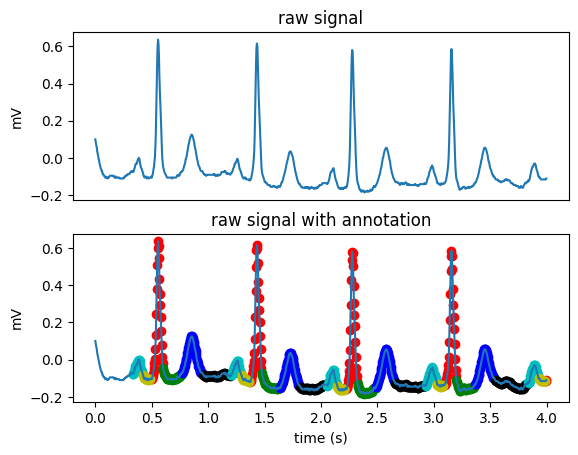

In [7]:
my_signal = signals[0:display_length, 1]

plt.figure()
# plot the raw signal
plt.subplot(2,1,1)
plt.plot(time_vector, my_signal,)
plt.title('raw signal')
plt.xticks([]) # hide x axis
plt.ylabel('mV')

# plot the raw signal with different annotations for each section within the signal
plt.subplot(2,1,2)
plt.plot(time_vector, my_signal,)
plt.title('raw signal with annotation')
myN = np.where(my_annotation==0)[0]
plt.scatter(time_vector[myN], my_signal[myN], color='r', marker='o' )

myst = np.where(my_annotation==1)[0]
plt.scatter(time_vector[myst], my_signal[myst], color='g', marker='o')

myt = np.where(my_annotation==2)[0]
plt.scatter(time_vector[myt], my_signal[myt], color='b', marker='o')

myiso = np.where(my_annotation==3)[0]
plt.scatter(time_vector[myiso], my_signal[myiso], color='k', marker='o')

myp = np.where(my_annotation==4)[0]
plt.scatter(time_vector[myp], my_signal[myp], color='c', marker='o')

mypq = np.where(my_annotation==5)[0]
plt.scatter(time_vector[mypq], my_signal[mypq], color='y', marker='o')
plt.ylabel('mV')
plt.xlabel('time (s)')

Now, use the custom libary "Helperfunction.py" to truncate each individual ECG signal

In [8]:
annsamp_0 = annotation.sample
anntype_0 = annotation.symbol

# iterate through each batch to the get raw signals and annotations.
one_anntype  = anntype_0  # one long annotation type for a long recording, it has string, i.e.['(', 'p', ')', '(', 'N', ')'...]
one_annsamp  = annsamp_0  # the index of the related annotation in the long time series
one_expand   = annot_expand # recomputed annotation, using 0,1,2,3.. to represent different sections of ECG signal

(single_ECG_list, single_annotation_list) = hf.seg_single_ECGs(my_signal, one_anntype, one_annsamp, one_expand)


Plot the first ECG signal example to see it. 

(-0.1568, 0.64575)

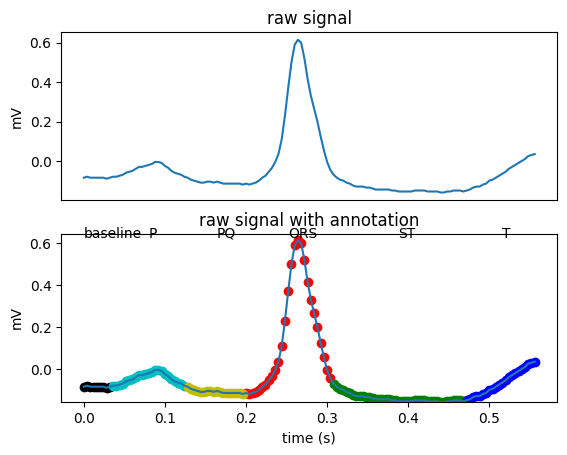

In [9]:
#%% plot an example to see the ECG signal with its annotation
which_ECG_example = 0
my_single_ECG = single_ECG_list[which_ECG_example]
my_annotation = single_annotation_list[which_ECG_example]
#time_vector = np.arange( 0, display_length/fs, 1/fs)  # time vector for selected signal

time_vector = np.arange( 0, len(my_single_ECG)/fs, 1/fs)  # time vector for selected signal


plt.figure()
plt.subplot(2,1,1)
plt.plot(time_vector, my_single_ECG)
plt.title('raw signal')
plt.xticks([]) # hide x axis
plt.ylabel('mV')

#%
ax=plt.subplot(2,1,2)
plt.plot(time_vector, my_single_ECG)
plt.title('raw signal with annotation')


#%
max_amp = max(my_single_ECG)  # the max amplitude of this single ECG recording
min_amp = min(my_single_ECG)  # the max amplitude of this single ECG recording


# annotate each segment of the signal, based on the annotations we have
myN = np.where(my_annotation==0)[0]
if len(myN) !=0:
    plt.scatter(time_vector[myN], my_single_ECG[myN], color='r', marker='o' )
    mid_point = len(myN)//2
    ax.text(time_vector[myN[mid_point]], max_amp*1.02, 'ORS')
    
myst = np.where(my_annotation==1)[0]
if len(myst) !=0:
    plt.scatter(time_vector[myst], my_single_ECG[myst], color='g', marker='o')
    mid_point = len(myst)//2
    ax.text(time_vector[myst[mid_point]], max_amp*1.02, 'ST')

myt = np.where(my_annotation==2)[0]
if len(myt) !=0:
    plt.scatter(time_vector[myt], my_single_ECG[myt], color='b', marker='o')
    mid_point = len(myt)//2
    ax.text(time_vector[myt[mid_point]], max_amp*1.02, 'T')

myiso = np.where(my_annotation==3)[0]
if len(myiso) !=0:
    plt.scatter(time_vector[myiso], my_single_ECG[myiso], color='k', marker='o')
    mid_point = len(myiso)//2
    ax.text(time_vector[myiso[0]], max_amp*1.02, 'baseline')

myp = np.where(my_annotation==4)[0]
if len(myp) !=0:
    plt.scatter(time_vector[myp], my_single_ECG[myp], color='c', marker='o')
    mid_point = len(myp)//2
    ax.text(time_vector[myp[mid_point]], max_amp*1.02, 'P')

mypq = np.where(my_annotation==5)[0]
if len(myp) !=0:
    plt.scatter(time_vector[mypq], my_single_ECG[mypq], color='y', marker='o')
    mid_point = len(mypq)//2
    ax.text(time_vector[mypq[mid_point]], max_amp*1.02, 'PQ')
       
plt.ylabel('mV')
plt.xlabel('time (s)')
plt.ylim([min_amp-min_amp*0.02, max_amp*1.05])
